# <center><font color='MediumSeaGreen'>Desafío guiado - Gráficos y correlación</font><center>

### <center><b> Bárbara Pérez </b><center>

__________________

## <font color='MediumSeaGreen'>Descripción</font>

La empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, está vez, a partir de gráficos existentes y la correlación que existe entre ellos con la data disponible. Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.

_______

## <font color='MediumSeaGreen'>Requerimientos</font> 

<b><font color='MediumSeaGreen'>1.</font> Importar librerías y .csv (2 punto). </b> para ello:

● Importe las librerías básicas para el análisis de datos

● Descargue e importe el archivo *nations.csv*.

In [1]:
#importar warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
#Importar librerias 
import pandas as pd #Version: 1.4.3
import numpy as np #Version: 1.23.0
import matplotlib.pyplot as plt #Version: 3.5.2
import scipy.stats as stats #Version: 1.8.1 
import seaborn as sns #Version: 0.11.2


**Tip**: El formato del archivo posee una codificación de tipo **'iso-8859-1'**. Investigue cómo se puede solucionar este problema utilizando el argumento encoding de *pd.read_csv*

In [3]:
df = pd.read_csv('nations.csv', encoding = 'latin-1')
#encoding = 'latin-1' --> Sin esta informacion entregaba un error

In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'region', 'gdp', 'school', 'adfert',
       'chldmort', 'life', 'pop', 'urban', 'femlab', 'literacy', 'co2',
       'gini'],
      dtype='object')

La base de datos contiene información a nivel mundial sobre demografía:

● <span style='background:gainsboro'><font color='dimgray'>country</font></span>: País.

● <span style='background:gainsboro'><font color='dimgray'>region</font></span>: Continente del país.

● <span style='background:gainsboro'><font color='dimgray'>gdp</font></span>: Producto Interno Bruto per cápita, precios 2005.

● <span style='background:gainsboro'><font color='dimgray'>school</font></span>: Promedio años de escolaridad.

● <span style='background:gainsboro'><font color='dimgray'>adfert</font></span>: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).

● <span style='background:gainsboro'><font color='dimgray'> chldmort</font></span>: Probabilidad de muerte antes de los 5 años por cada 1000.

● <span style='background:gainsboro'><font color='dimgray'>life</font></span>: Esperanza de vida al nacer.

● <span style='background:gainsboro'><font color='dimgray'>pop</font></span>: Población total.

● <span style='background:gainsboro'><font color='dimgray'>urban</font></span>: Porcentaje de población urbana.

● <span style='background:gainsboro'><font color='dimgray'>femlab</font></span>: Tasa entre hombres y mujeres en el mercado laboral.

● <span style='background:gainsboro'><font color='dimgray'>literacy</font></span>: Tasa de alfabetismo.

● <span style='background:gainsboro'><font color='dimgray'>co2</font></span>: Toneladas de Co2 mitidas per cápita.

● <span style='background:gainsboro'><font color='dimgray'>gini</font></span>: Coeficiente de desigualdad del ingreso.

● Apellidos desde la A hasta la N: Enfocarse en las variables <span style='background:gainsboro'><font color='dimgray'>chldmort</font></span>, <span style='background:gainsboro'><font color='dimgray'>adfert</font></span> y <span style='background:gainsboro'><font color='dimgray'>life</font></span>.

● Apellidos desde la M hasta la Z: Enfocarse en las variables <span style='background:gainsboro'><font color='dimgray'>femlab</font></span>, <span style='background:gainsboro'><font color='dimgray'>literacy</font></span> y <span style='background:gainsboro'><font color='dimgray'>school</font></span>.

In [27]:
#Lista con nombres de las variables que me sirven según apellido
variables_bpr = ['country', 'region', 'gdp', 'school', 'pop', 'urban', 'femlab', 'literacy', 'co2',
       'gini']

______

<b><font color='MediumSeaGreen'>2.</font> Refactorizar gráficos matplotlib a seaborn (3 puntos).</b>

A partir de una serie de gráficos construidos con <span style='background:gainsboro'><font color='dimgray'>matplotlib</font></span>, se solicita refactorizarlos utilizando seaborn. Además, se presenta la función que se utilizó para construirlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.

● Histogramas

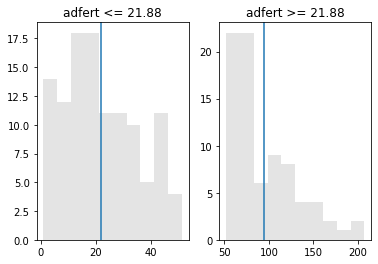

In [21]:
#Codigo copiado
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1,
    0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))

binarize_histogram(df, 'adfert')

In [22]:
# creamos nuestra función, con un mayor número de 'bins' acorde a la sugerencia del profesor
import seaborn as sns
def binarize_histogram_mejorado(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=2, sharex=False, sharey=False)
    grip = grid.map(sns.distplot, variable, kde=True, bins=20).set_axis_labels("")
    axes = grid.axes.flatten()
    axes[0].set_title(f"{variable} <= {round(np.mean(hist_0), 2)}")
    axes[1].set_title(f"{variable} >= {round(np.mean(hist_0), 2)}")
    axes[0].axvline(np.mean(hist_0))
    axes[1].axvline(np.mean(hist_1))

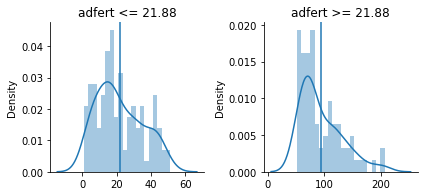

In [23]:
binarize_histogram_mejorado(df, 'adfert')

● Boxplots

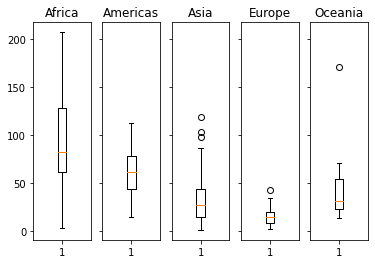

In [24]:
#código del ejemplo
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
grouped_boxplot(df, 'adfert', 'region')

In [25]:
#creamos nuestra funcion
def grouped_boxplot_mejorada(dataframe, variable, group_by):
    sns.boxplot(x=dataframe[group_by], y=dataframe[variable]).set(ylabel='')

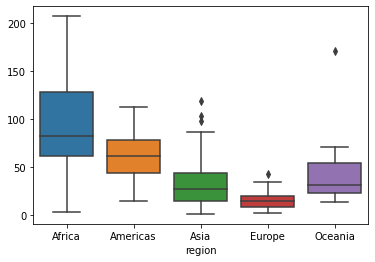

In [26]:
grouped_boxplot_mejorada(df, 'adfert', 'region')

● Scatterplots

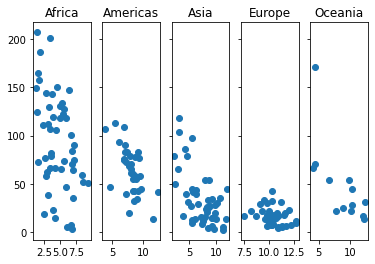

In [12]:
#código del ejemplo
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
grouped_scatterplot(df, 'school', 'adfert', 'region')

In [13]:
#nuestra funcion
def grouped_scatterplot_mejorada(dataframe, x, y, group_by):
    grid = sns.FacetGrid(dataframe, col=group_by, sharex=False).set_axis_labels("", "")
    grid = grid.map(sns.scatterplot, x, y)
    #sns.scatterplot(x=tmp[x], y=tmp[y])

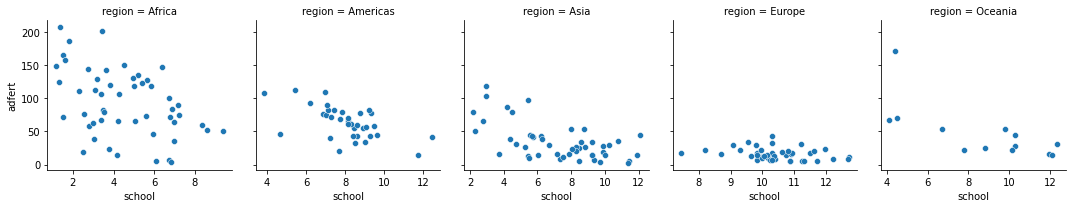

In [14]:
grouped_scatterplot_mejorada(df, 'school', 'adfert', 'region')

_____

<b><font color='MediumSeaGreen'>3.</font> Generar un heatmap entre todas las variables (2 puntos):</b>
Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

<AxesSubplot:>

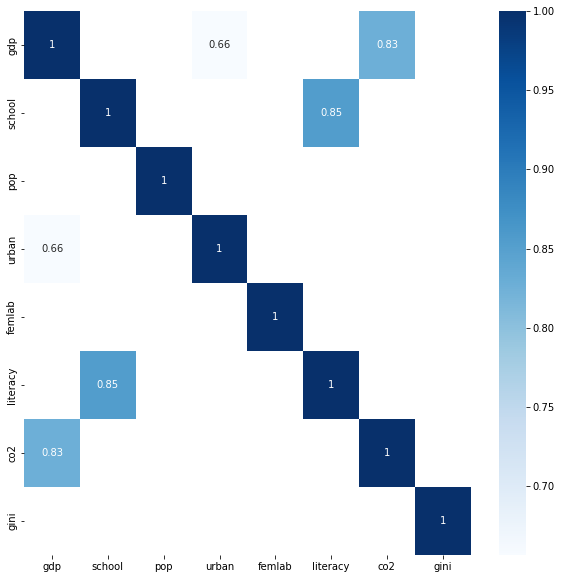

In [15]:
#creamos el subset
working_subset = df.loc[:, variables_bpr]
#creamos la matriz de correlaciones
corr_mat = working_subset.corr()
corr_mat = corr_mat[(corr_mat > 0.6) | (corr_mat < -0.6)] #tip de Wilson
#graficamos
plt.figure(figsize = (10,10))
sns.heatmap(corr_mat, cmap='Blues', annot=True)

**Comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6**

- **Relaciones directamente proporcionales:**
    - Urbanización y Producto interno bruto ('urban' y 'gpd'), 
    - Literatura y Escolaridad ('literacy' y 'school'), 
    - Polución y Producto interno bruto ('co2' y 'gpd')


- **Relaciones inversamente proporcionales:** No se observan acorde al criterio de corte

___

<b><font color='MediumSeaGreen'>4.</font> A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones (3 puntos):</b>



Comente brevemente las principales correlaciones a través de las regiones.

- **Tip**: Genere una nueva tabla segmentando con la siguiente sintaxis: =
df.loc[:,['variables', 'a', 'agregar']]. N. No olvide agregar la variable
región.

- **Tip**: Genere un loop para recorrer cada región y generar un heatmap

In [16]:
#obtenemos el listado de variables
principales_correlaciones = ['region','gdp','school','urban','literacy', 'co2']
#creamos el subset que contendrá las variables con las correlaciones mas significativas
df_principales_correlaciones = df.loc[:, principales_correlaciones]

In [17]:
#verificamos el contenido del subset
df_principales_correlaciones.sample(10)

,region,gdp,school,urban,literacy,co2
147,Europe,32096.400391,10.183333,84.400002,NaN,42.400002
10,Africa,3628.000000,5.850000,61.133331,NaN,1.550000
43,Africa,9175.400391,8.350000,60.483334,NaN,31.400000
67,Americas,6005.600098,7.100000,62.983334,83.900002,3.500000
155,Europe,14491.200195,10.933333,67.866669,99.800003,11.650000
184,Oceania,2906.800049,8.800000,22.483334,NaN,NaN
58,Americas,9081.200195,6.883333,85.399994,89.800003,6.850000
151,Europe,17476.199219,10.883333,67.183334,99.400002,21.200001
45,Africa,4468.799805,6.850000,21.600000,86.900002,3.300000
183,Oceania,NaN,9.800000,70.900002,NaN,5.650000


In [18]:
#obtenemos las regiones
regiones = df_principales_correlaciones['region'].value_counts()

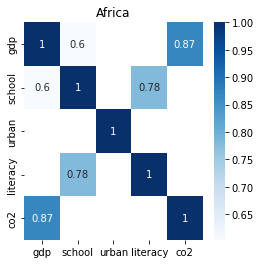

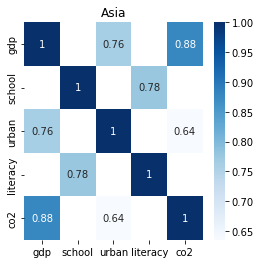

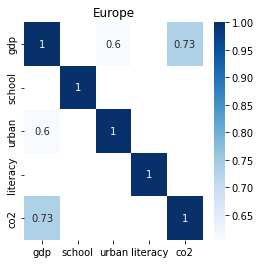

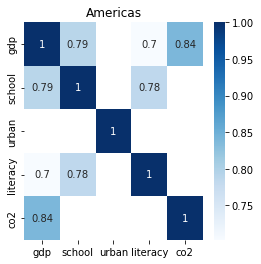

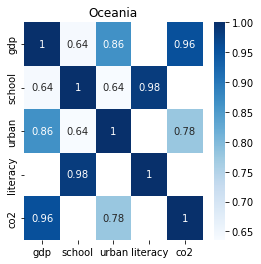

In [19]:
#iteramos sobre las regiones
for i in regiones.index:
    corr_mat = df_principales_correlaciones[df_principales_correlaciones['region'] == i].corr()
    #filtramos por criterio de corte .6
    corr_mat = corr_mat[(corr_mat > 0.6) | (corr_mat < -0.6)]
    plt.figure(figsize = (4,4))
    ax = plt.axes()
    ax.set_title(i)
    sns.heatmap(corr_mat, cmap='Blues', annot=True, ax = ax)

**Comente brevemente las principales correlaciones a través de las regiones.**

**Principales correlaciones entre las regiones (acorde a un criterio de corte de 0.6):**

- **Africa:** Literatura y escolaridad (literacy - school)

- **Asia:** Literatura y escolaridad (literacy - school)

- **Europe:** Urbanidad y Producto interno bruto (urban - gpd)

- **Americas:** Literatura y escolaridad (literacy - school)

- **Oceania:** Urbanidad y polución(urban - co2), Escolaridad y urbanidad (school - urban) y Literatura y escolaridad (literacy - school)